In [1]:
%run base.ipynb
import gym
import matplotlib.pyplot as plt

import abides_gym
from policies_v1 import SigPolicy
from train_execution_v0 import train
import utils

In [2]:
# register market making env for gym use 
from gym.envs.registration import register
from abides_gym.envs.markets_execution_environment_v0 import (
    SubGymMarketsExecutionEnv_v0,
)

register(
    id="market-execution-v0",
    entry_point=SubGymMarketsExecutionEnv_v0,
)

def generate_env(seed):
    """
    generates specific environment with the parameters defined and set the seed
    """
    env = gym.make(
            "market-execution-v0",
            background_config="rmsc04",
            execution_window="04:00:00",
            timestep_duration="10s",
            direction="BUY",
            parent_order_size=20000,
            order_fixed_size=50,
            first_interval="00:05:00",
            not_enough_reward_update=-100,#penalty
            debug_mode=True
        )
    env.seed(seed)
    
    return env

In [3]:
# create the environment
env = generate_env(5)

In [4]:
episodes = 100
lr = 0.001
window_length = None
eps = 1.0
eps_decay = utils.linear_decay(epochs=40_000, start=eps, end=0.1)

sigpolicy = SigPolicy(env, 3, in_channels=4)
sigpolicy.initialize_parameters(zero_bias=True)


results = train(env, 
                sigpolicy, 
                episodes,
                discount=0.97,
                learning_rate=lr, 
                epsilon=eps,
                epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

print(sigpolicy.linear.weight.data)


  0%|          | 0/100 [00:00<?, ?it/s]
 Episode 0 | step 100 | reward 2.5825 | loss 0.34064096794992715
Q values: tensor([0.0669, 0.0308, 0.0533], grad_fn=<SelectBackward>)

 Episode 0 | step 200 | reward 4.334075000000001 | loss 0.6410367162229849
Q values: tensor([0.1427, 0.1177, 0.1427], grad_fn=<SelectBackward>)

 Episode 0 | step 300 | reward 1.0460750000000005 | loss 0.7976903703030447
Q values: tensor([0.1117, 0.1048, 0.1143], grad_fn=<SelectBackward>)

 Episode 0 | step 400 | reward 5.803649999999999 | loss 1.3770542839571507
Q values: tensor([0.3270, 0.3338, 0.3261], grad_fn=<SelectBackward>)

 Episode 0 | step 500 | reward 0.7661999999999975 | loss 1.7261111587963855
Q values: tensor([0.2415, 0.3297, 0.3644], grad_fn=<SelectBackward>)

 Episode 0 | step 600 | reward 2.3565499999999977 | loss 2.7492695319502474
Q values: tensor([0.4947, 0.5491, 0.4873], grad_fn=<SelectBackward>)

 Episode 0 | step 700 | reward 11.708099999999996 | loss 4.163599813467258
Q values: tensor([1.04

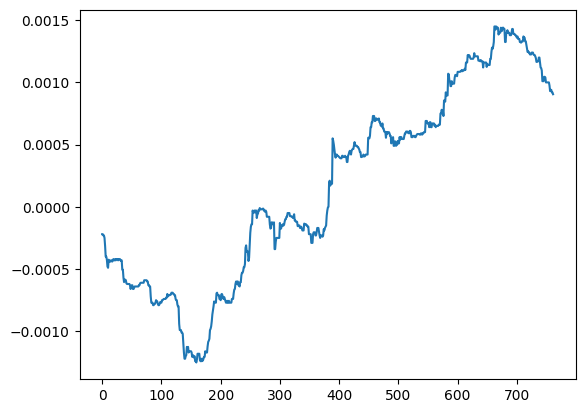

In [17]:
#plt.plot(results["rewards"])
#plt.plot(results["actions"][0])
#plt.plot([reward if reward > -2000 else 0 for reward in results["rewards"]])

import numpy as np
hist = list(results["history"])
plt.plot(np.array(hist)[:,3])


In [ ]:
import pickle

# write results 
with open('../results/error.pkl', 'wb') as f:  # open a text file
    pickle.dump(results, f) # serialize the list
f.close()

In [ ]:
import pickle

# load results
with open('../results/500_runs.pkl', 'rb') as f:
    deserialized_results = pickle.load(f)
f.close()

In [ ]:
#plt.plot(deserialized_results["rewards"])
#plt.plot(results["losses"])
plt.plot([reward if reward > -2000 else 0 for reward in deserialized_results["rewards"]])

hist = list(deserialized_results["history"])
#plt.plot(np.array(hist)[:,3])